<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.


Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [60]:
#Importation de la librairie Pandas
import pandas as pd

In [61]:
#Importation de la librairie plotly express
import numpy as np
import matplotlib.pyplot as plt


In [62]:
#privilégiez les solutions provenants de Stack Overflow ou Medium

In [63]:
import warnings
warnings.simplefilter("ignore")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [64]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("dataset/Datagestion-stock/web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel('dataset/Datagestion-stock/erp.xlsx')
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel('dataset/Datagestion-stock/liaison.xlsx')


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>


In [65]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [66]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

#La nature des données dans chacune des colonnes
print("La nature des données :")
df_erp.info()
#Le nombre de valeurs présentes dans chacune des colonnes
valeurs = df_erp.count()
print("Le nombre de valeurs présentes dans chacune des colonnes :")
valeurs

Le tableau comporte 6 colonne(s)
La nature des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB
Le nombre de valeurs présentes dans chacune des colonnes :


product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64

In [67]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [68]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons = df_erp[df_erp.duplicated('product_id', keep=False)]
if not doublons.empty:
    print("Il y a des doublons.")
else:
    print("Il n'y a pas de doublons.")

Il n'y a pas de doublons.


In [69]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes = df_erp['stock_status'].unique()
print("Les valeurs distinctes de la colonne 'stock_status' :")
print(valeurs_distinctes)
#À quelle(s) autre(s) colonne(s) sont-elles liées ?


Les valeurs distinctes de la colonne 'stock_status' :
['instock' 'outofstock']


In [70]:
#Création d'une colonne "stock_status_2
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] > 0, 'instock', 'outofstock')



#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
df_erp['stock_status_validation'] = np.where(df_erp['stock_status'] == df_erp['stock_status_2'], True, False)
df_erp


#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,stock_status_validation
0,3847,1,24.2,16,instock,12.88,instock,True
1,3849,1,34.3,10,instock,17.54,instock,True
2,3850,1,20.8,0,outofstock,10.64,outofstock,True
3,4032,1,14.1,26,instock,6.92,instock,True
4,4039,1,46.0,3,outofstock,23.77,instock,False
...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock,True
821,7204,0,45.0,9,instock,24.18,instock,True
822,7247,1,54.8,6,instock,27.18,instock,True
823,7329,0,26.5,14,instock,13.42,instock,True


In [71]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
false_validations = df_erp[df_erp['stock_status_validation'] == False]

false_validations
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,stock_status_validation
4,4039,1,46.0,3,outofstock,23.77,instock,False
398,4885,1,18.7,0,instock,9.66,outofstock,False


In [72]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
df_erp["stock_status_validation_numbers"] = np.where(df_erp['stock_status_validation'], 1, 0)

someOfStockValidation = df_erp["stock_status_validation_numbers"].sum()
print("The total number of validated stock statuses is:", someOfStockValidation)


The total number of validated stock statuses is: 823


In [73]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [74]:
#Corriger la ou les données incohérentes
df_erp["stock_status"] =   df_erp["stock_status_2"]

#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp["stock_status"] == df_erp["stock_status_2"]


0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [75]:
if 'stock_status_validation' in df_erp.columns:
    df_erp.drop(columns=['stock_status_validation'], inplace=True)
if 'stock_status_validation_numbers' in df_erp.columns:
    df_erp.drop(columns=['stock_status_validation_numbers'], inplace=True)
if 'stock_status_2' in df_erp.columns:
    df_erp.drop(columns=['stock_status_2'], inplace=True)
if 'new_stock_status' in df_erp.columns:
    df_erp.drop(columns=['new_stock_status'], inplace=True)
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [76]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

print("Nombre d'articles avec un prix non renseigné: {}, négatif: {}, nul: {}".format(
    df_erp['price'].isnull().sum(),
    (df_erp['price'] < 0).sum(),
    (df_erp['price'] == 0).sum()
))
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Prix minimum (excluant les valeurs nulles):", df_erp['price'].min(skipna=True))

#Afficher le prix maximum de la colonne "price"
print("Prix minimum (excluant les valeurs nulles):", df_erp['price'].max(skipna=True))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
negative_prices = df_erp[df_erp['price'] < 0]
print("Produits avec un prix négatif:\n", negative_prices["price"])

# i  need to  correct  those foult  so  i  should to change  the price   as  we know there  is relation bettwen the  price and  the porchase_price
# wich  is the porchase_price *  2 is the  allmost  the  some with price so  i will change it  to  the real  one  

def adjust_price(row):
    if row['price'] < 0:
        return row['purchase_price'] * 2
    return row['price']

# Appliquer la fonction pour corriger les prix
df_erp['price'] = df_erp.apply(adjust_price, axis=1)

# Afficher le DataFrame après correction
print("\nDataFrame après correction des prix:\n", df_erp)
print("Nombre d'articles avec un prix non renseigné: {}, négatif: {}, nul: {}".format(
    df_erp['price'].isnull().sum(),
    (df_erp['price'] < 0).sum(),
    (df_erp['price'] == 0).sum()
))

Nombre d'articles avec un prix non renseigné: 0, négatif: 3, nul: 0
Nombres d'article avec un prix non renseignés: 26554.85
Prix minimum (excluant les valeurs nulles): -20.0
Prix minimum (excluant les valeurs nulles): 225.0
Produits avec un prix négatif:
 151   -20.0
469    -8.0
739    -9.1
Name: price, dtype: float64

DataFrame après correction des prix:
      product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8    

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [77]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Quantité minimum:", df_erp['stock_quantity'].min())


#Afficher la quantité maximum de la colonne "stock_quantity"
print("Quantité maximum:", df_erp['stock_quantity'].max())

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
negative_stock = df_erp[df_erp['stock_quantity'] < 0]
print("Produits avec un stock négatif:\n", negative_stock['stock_quantity'])


Quantité minimum: -10
Quantité maximum: 145
Produits avec un stock négatif:
 449   -10
573    -1
Name: stock_quantity, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [78]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Valeurs uniques dans la colonne onsale_web:", df_erp['onsale_web'].unique())


Valeurs uniques dans la colonne onsale_web: [1 0]


In [79]:
#Quelles sont les colonnes à conserver selon vous?
###### i think  we  should to  keep the column  that  have  1 

In [80]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [81]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombre d'articles avec un prix non renseigné dans purchase_price:", df_erp['purchase_price'].isnull().sum())

# Afficher le prix minimum de la colonne "purchase_price"
print("Prix minimum dans purchase_price:", df_erp['purchase_price'].min())

# Afficher le prix maximum de la colonne "purchase_price"
print("Prix maximum dans purchase_price:", df_erp['purchase_price'].max())

Nombre d'articles avec un prix non renseigné dans purchase_price: 0
Prix minimum dans purchase_price: 2.74
Prix maximum dans purchase_price: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [82]:
#Dimension du dataset
n_observations = df_web.shape[0]  # Number of rows
n_caracteristiques = df_web.shape[1]  # Number of columns
#Nombre d'observations
print("Nombre d'observations :", n_observations)
#Nombre de caractéristiques

print("Nombre de caractéristiques :", n_caracteristiques)

Nombre d'observations : 1513
Nombre de caractéristiques : 29


In [83]:
# Consulter le nombre de colonnes
nombre_de_colonnes = df_web.shape[1]  # ou len(df_erp.columns)
print("Nombre de colonnes :", nombre_de_colonnes)

# La nature des données dans chacune des colonnes
nature_des_donnees = df_web.dtypes
print("\nNature des données dans chaque colonne :\n", nature_des_donnees)

# Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs = df_web.count()
print("\nNombre de valeurs présentes dans chaque colonne :\n", nombre_de_valeurs)

Nombre de colonnes : 29

Nature des données dans chaque colonne :
 sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent  

In [84]:
#Selon vous, quelles sont les colonnes à conserver ?
#we  should remove  the colonne that have 0 in Nombre de valeurs présentes dans chaque colonne 

In [85]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns=["tax_class", "post_content", "post_password", "post_content_filtered"], inplace=True)

#Le nombre de valeurs présentes dans chacune des colonnes
print("Non-null values per column:")
print(df_web.count())

Non-null values per column:
sku                  1428
virtual              1513
downloadable         1513
rating_count         1513
average_rating       1430
total_sales          1430
tax_status            716
post_author          1430
post_date            1430
post_date_gmt        1430
product_type         1429
post_title           1430
post_excerpt          716
post_status          1430
comment_status       1430
ping_status          1430
post_name            1430
post_modified        1430
post_modified_gmt    1430
post_parent          1430
guid                 1430
menu_order           1430
post_type            1430
post_mime_type        714
comment_count        1430
dtype: int64


In [86]:
#Visualisation des valeurs de la colonne sku
print (df_web["sku"])
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web[df_web["sku"].str.match(r"^(?![0-9]\b).*", na=False)]
# df_web[df_web["sku"].str.match(r"^[0-9]", na=False)]
duplicate_skus = df_web[df_web.duplicated(subset="sku", keep=False)]
print(duplicate_skus)

0       11862
1       16057
2       14692
3       16295
4       15328
        ...  
1508    16326
1509    15662
1510    15329
1511    14827
1512    16004
Name: sku, Length: 1513, dtype: object
        sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0     11862        0             0             0             0.0          3.0   
1     16057        0             0             0             0.0          5.0   
2     14692        0             0             0             0.0          5.0   
3     16295        0             0             0             0.0         14.0   
4     15328        0             0             0             0.0          2.0   
...     ...      ...           ...           ...             ...          ...   
1508  16326        0             0             0             0.0          5.0   
1509  15662        0             0             0             0.0         15.0   
1510  15329        0             0             0             0.0          3.0 

In [87]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web["sku"] = df_web["sku"].apply(lambda x: x if str(x).isdigit() else "INVALID")
df_web[df_web["sku"] == 'INVALID']


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
8,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
20,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
30,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
37,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
41,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,INVALID,0,0,0,0.0,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1429,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1432,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1445,INVALID,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Identifier les lignes sans code articles
missing_sku_df = df_web[df_web["sku"].isna() | (df_web["sku"] == "")]
print("Rows without SKU:")
print(missing_sku_df)


Rows without SKU:
Empty DataFrame
Columns: [sku, virtual, downloadable, rating_count, average_rating, total_sales, tax_status, post_author, post_date, post_date_gmt, product_type, post_title, post_excerpt, post_status, comment_status, ping_status, post_name, post_modified, post_modified_gmt, post_parent, guid, menu_order, post_type, post_mime_type, comment_count]
Index: []

[0 rows x 25 columns]


In [89]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
# Remove rows where SKU is 'INVALID'
df_web = df_web[df_web["sku"] != "INVALID"]


In [90]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?

df_web = df_web.drop_duplicates(subset="sku", keep="first")
df_web 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,...,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,...,closed,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,...,closed,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,...,closed,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,...,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,16043,0,0,0,0.0,10.0,taxable,2.0,2018-02-12 10:41:11,2018-02-12 09:41:11,...,closed,pierre-gaillard-saint-joseph-2018,2020-08-26 14:05:02,2020-08-26 12:05:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1327,15845,0,0,0,0.0,9.0,NaN,2.0,2020-04-25 12:43:23,2020-04-25 10:43:23,...,closed,chateau-jean-faure-saint-emilion-grand-cru-2016,2020-07-20 17:09:23,2020-07-20 15:09:23,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1339,15951,0,0,0,0.0,9.0,NaN,2.0,2019-05-16 15:54:52,2019-05-16 13:54:52,...,closed,jacqueson-rully-rouge-1er-cru-les-preaux-2018,2020-08-07 15:55:03,2020-08-07 13:55:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1353,13074,0,0,0,0.0,4.0,NaN,2.0,2018-02-12 14:25:28,2018-02-12 13:25:28,...,closed,chateau-de-vaudieu-chateauneuf-du-pape-lavenue...,2019-12-09 10:40:03,2019-12-09 09:40:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [91]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

#3 - Que constatez-vous?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [92]:
#Dimension du dataset
num_rows, num_columns = df_liaison.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of characteristics (columns): {num_columns}")

#Nombre d'observations
print(df_liaison.info())

#Nombre de caractéristiques
print(df_liaison.count())

Number of observations (rows): 825
Number of characteristics (columns): 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None
id_web        734
product_id    825
dtype: int64


In [93]:
#Consulter le nombre de colonnes
print(df_liaison.describe())

#La nature des données dans chacune des colonnes
df_liaison.info()
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.describe()

        product_id
count   825.000000
mean   5162.597576
std     902.644635
min    3847.000000
25%    4348.000000
50%    4907.000000
75%    5805.000000
max    7338.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [94]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
is_product_id_unique = df_liaison["product_id"].is_unique
print(f"Are all 'product_id' values unique? {is_product_id_unique}")

Are all 'product_id' values unique? True


In [95]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
is_id_web_unique = df_liaison["id_web"].is_unique
print(f"Are all 'id_web' values unique? {is_id_web_unique}")

Are all 'id_web' values unique? False


In [96]:
#Avons-nous des articles sans correspondances?
missing_product_id = df_liaison["product_id"].isnull().sum()
missing_id_web = df_liaison["id_web"].isnull().sum()

print(f"Number of missing 'product_id': {missing_product_id}")
print(f"Number of missing 'id_web': {missing_id_web}")


Number of missing 'product_id': 0
Number of missing 'id_web': 91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [97]:
#Fusion des fichiers df_erp et df_liaison
df_merged = pd.merge(df_erp, df_liaison, how="outer", on="product_id", indicator=True)


In [98]:
df_merged.duplicated().sum()

0

In [99]:
df_merged[df_merged["_merge"] != "both" ]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge


In [100]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   purchase_price  825 non-null    float64 
 6   id_web          734 non-null    object  
 7   _merge          825 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 46.2+ KB


In [101]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 1391
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                712 non-null    object        
 1   virtual            712 non-null    int64         
 2   downloadable       712 non-null    int64         
 3   rating_count       712 non-null    int64         
 4   average_rating     712 non-null    float64       
 5   total_sales        712 non-null    float64       
 6   tax_status         360 non-null    object        
 7   post_author        712 non-null    float64       
 8   post_date          712 non-null    datetime64[ns]
 9   post_date_gmt      712 non-null    datetime64[ns]
 10  product_type       712 non-null    object        
 11  post_title         712 non-null    object        
 12  post_excerpt       360 non-null    object        
 13  post_status        712 non-null    object        
 14  comment_status

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [102]:
#Fusionnez les datasets df_merge et df_web
# df_merged
#df_web = pd.merge(df_web, df_liaison[['id_web', 'product_id']], left_on='sku', right_on='id_web', how='left')
#df_web.head()
#df_web.drop(columns=['id_web'], inplace=True)

In [103]:
#Avons-nous des lignes sans correspondances?
df_merged = df_merged.rename(columns={'_merge': 'merge_status'})
df_final_merge = pd.merge(df_merged, df_web, left_on="id_web", right_on="sku", how="inner", indicator=True)


In [104]:
df_final_merge.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,merge_status,sku,virtual,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,10.64,15300,both,15300,0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
3,4032,1,14.1,26,instock,6.92,19814,both,19814,0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
4,4039,1,46.0,3,instock,23.77,19815,both,19815,0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

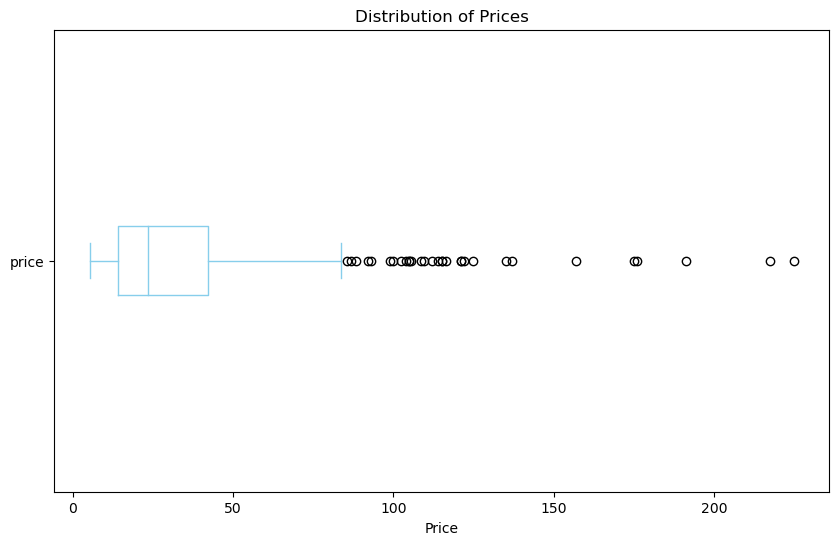

In [105]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_final_merge['price'].plot(kind='box', vert=False, color='skyblue')

plt.title('Distribution of Prices')
plt.xlabel('Price')

plt.show()

In [106]:
#Autre méthode avec plotly express

import plotly.express as px

# Create a box plot using Plotly Express for the 'price' column
fig = px.box(df_final_merge, x='price', title='Distribution of Prices')

# Show the plot
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par l'interval interquartile</h3>
</div>

In [107]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_final_merge.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,post_parent,menu_order,comment_count
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.0,712.0,712.0,712.0,712.000000,712.0,712,712,712,712,712.0,712.0,712.0
mean,5029.557584,0.998596,32.312430,23.469101,16.894635,0.0,0.0,0.0,0.0,8.525281,2.0,2018-08-21 08:33:08.113764096,2018-08-21 07:04:29.012640512,2020-06-21 22:02:37.813202432,2020-06-21 20:09:07.139044864,0.0,0.0,0.0
min,3847.000000,0.000000,5.200000,-1.000000,2.740000,0.0,0.0,0.0,0.0,0.000000,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,0.0,0.0
25%,4279.250000,1.000000,14.037500,9.000000,7.235000,0.0,0.0,0.0,0.0,5.000000,2.0,2018-02-27 14:12:06.750000128,2018-02-27 13:12:06.750000128,2020-06-19 10:07:33,2020-06-19 08:07:33,0.0,0.0,0.0
50%,4794.500000,1.000000,23.400000,20.000000,12.280000,0.0,0.0,0.0,0.0,8.000000,2.0,2018-04-19 14:44:46.500000,2018-04-19 12:44:46.500000,2020-08-04 09:30:10.500000,2020-08-04 07:30:10.500000,0.0,0.0,0.0
75%,5709.500000,1.000000,42.025000,30.250000,22.030000,0.0,0.0,0.0,0.0,11.000000,2.0,2019-01-31 14:29:05,2019-01-31 13:29:05,2020-08-25 10:42:32,2020-08-25 08:42:32,0.0,0.0,0.0
max,7338.000000,1.000000,225.000000,145.000000,137.810000,0.0,0.0,0.0,0.0,122.000000,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,0.0,0.0
std,787.242401,0.037477,27.620894,22.242346,14.842603,0.0,0.0,0.0,0.0,8.161136,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [108]:
#Définissez un seuil pour les articles "outliers" en prix
# Calcul des quartiles et de l'IQR
Q1 = df_final_merge['price'].quantile(0.25)
Q3 = df_final_merge['price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les seuils pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df_final_merge[(df_final_merge['price'] < lower_bound) | (df_final_merge['price'] > upper_bound)]

# Optionnel : afficher les outliers
print(outliers[['price']].count())


price    31
dtype: int64


In [109]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
# Nombre total d'articles (taille de l'ensemble du catalogue)
total_items = df_final_merge.shape[0]

# Calcul du nombre d'outliers
outliers_count = outliers.shape[0]

# Calcul de la proportion d'outliers
outliers_proportion = outliers_count / total_items

# Affichage des résultats
print(f"Nombre total d'articles dans le catalogue : {total_items}")
print(f"Nombre d'outliers détectés : {outliers_count}")
print(f"Proportion d'outliers dans le catalogue : {outliers_proportion:.4f} ({outliers_proportion*100:.2f}%)")


Nombre total d'articles dans le catalogue : 712
Nombre d'outliers détectés : 31
Proportion d'outliers dans le catalogue : 0.0435 (4.35%)


In [110]:
df_final_merge["product_id"].duplicated().sum()

0

In [111]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [112]:
##############################
# Calculer le CA su site web #
##############################

# Créer la colonne "ca_par_article" en multipliant le prix par la quantité vendue
df_final_merge['ca_par_article'] = df_final_merge['price'] * df_final_merge['total_sales']

# Calculer la somme de la colonne "ca_par_article" pour obtenir le CA total
ca_total = df_final_merge['ca_par_article'].sum()

# Afficher le chiffre d'affaires total
print(f"Le chiffre d'affaires total du site web est : {ca_total:.2f}")



Le chiffre d'affaires total du site web est : 153353.90


In [113]:
df_final_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,merge_status,sku,virtual,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,ca_par_article
0,3847,1,24.2,16,instock,12.88,15298,both,15298,0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,1,34.3,10,instock,17.54,15296,both,15296,0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,308.7
2,3850,1,20.8,0,outofstock,10.64,15300,both,15300,0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,0.0
3,4032,1,14.1,26,instock,6.92,19814,both,19814,0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,169.2
4,4039,1,46.0,3,instock,23.77,19815,both,19815,0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,138.0


In [114]:
df_final_merge["ca_par_article"]

0      145.2
1      308.7
2        0.0
3      169.2
4      138.0
       ...  
707    133.0
708     75.6
709    247.5
710    345.0
711    211.9
Name: ca_par_article, Length: 712, dtype: float64

In [115]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_final_merge = df_final_merge.sort_values(by='ca_par_article', ascending=False)

In [116]:
#Réinitialiser l'index du dataset par un reset_index
df_final_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
df_final_merge.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,merge_status,sku,virtual,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,ca_par_article
0,4150,1,59.0,123,instock,35.45,1366,both,1366,0,...,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,6844.0
1,4352,1,225.0,0,outofstock,137.81,15940,both,15940,0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,2475.0
2,4726,1,12.7,0,outofstock,6.82,14950,both,14950,0,...,2020-05-06 11:35:01,2020-05-06 09:35:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1549.4
3,5067,1,59.9,3,instock,30.95,15346,both,15346,0,...,2020-02-13 17:00:01,2020-02-13 16:00:01,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1317.8
4,5379,1,11.1,33,instock,5.68,14561,both,14561,0,...,2020-07-11 14:00:03,2020-07-11 12:00:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1232.1
5,5892,1,191.3,98,instock,116.06,14983,both,14983,0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,1147.8
6,4353,1,79.5,127,instock,45.91,12587,both,12587,0,...,2020-08-22 11:45:02,2020-08-22 09:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,1113.0
7,5826,1,41.2,34,instock,21.71,15325,both,15325,0,...,2020-05-21 14:00:02,2020-05-21 12:00:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,824.0
8,6212,1,115.0,16,instock,59.42,13996,both,13996,0,...,2020-06-16 09:30:16,2020-06-16 07:30:16,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,805.0
9,5026,1,86.8,101,instock,50.13,13913,both,13913,0,...,2020-05-11 14:35:02,2020-05-11 12:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both,781.2


In [117]:
top_20 = df_final_merge.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_20, x= top_20.index, y='ca_par_article',
             title='Top 20 Products by Sales Revenue (CA)',
             labels={'index': 'Product Index', 'ca_par_article': 'Sales Revenue (CA)'})
fig.show()

In [118]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_final_merge['ca_share'] = df_final_merge['ca_par_article'] / df_final_merge['ca_par_article'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_final_merge['cumulative_ca_share'] = df_final_merge['ca_share'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles_80 = df_final_merge[df_final_merge['cumulative_ca_share'] <= 0.80]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion = len(articles_80) / len(df_sorted) * 100

print(f"Number of articles representing 80% of the total CA: {len(articles_80)}")
print(f"Proportion of these articles in the entire catalog: {proportion:.2f}%")

NameError: name 'df_sorted' is not defined

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
df_final_merge.columns

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_final_merge = df_final_merge.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_final_merge.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en quantité
top_20_sales = df_final_merge.head(20)

#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(top_20_sales, x=top_20_sales.index, y='total_sales',
             title='Top 20 Products by Quantity Sold',
             labels={'x': 'Index', 'total_sales': 'Quantity Sold'})
fig.show()

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

total_quantity_sold = df_final_merge['total_sales'].sum()

#Créer une colonne calculant la part en quantité de la ligne dans le dataset

df_final_merge['percentage_of_total_sales'] = (df_final_merge['total_sales'] / total_quantity_sold) * 100


#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_final_merge['cumulative_percentage'] = df_final_merge['percentage_of_total_sales'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

products_80_percent = df_final_merge[df_final_merge['cumulative_percentage'] <= 80]

proportion_80_percent = len(products_80_percent) / len(df_sorted_by_sales) * 100


#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Products representing 80% of total sales:")
print(products_80_percent[['product_id', 'total_sales', 'percentage_of_total_sales', 'cumulative_percentage']])

print("\nProportion of products that make up 80% of sales:", proportion_80_percent, "%")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np 

#Création de la colonne Rotation de stock
df_final_merge['stock_rotation'] = df_final_merge['stock_quantity'] / df_final_merge['total_sales'] * 12  # 12 months in a year


#Remplacement des "inf" par 0
df_final_merge['stock_rotation'].replace(np.inf, 0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_sorted_by_stock = df_final_merge.sort_values(by='stock_rotation', ascending=False)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

top_20_stock = df_sorted_by_stock.head(20)

# Display the products and stock rotation
print(top_20_stock[['product_id', 'stock_quantity', 'total_sales', 'stock_rotation']])

# Step 5: Plotting a bar chart using Plotly Express
fig = px.bar(top_20_stock, x= top_20_stock.index, y='stock_rotation',
             title='Top 20 Products with Most Months of Stock',
             labels={'x': 'Index', 'stock_rotation': 'Months of Stock'})
fig.show()

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final_merge['Valorisation_stock_euros'] = df_final_merge['stock_quantity'] * df_final_merge['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
total_stock_value = df_final_merge['Valorisation_stock_euros'].sum()

print(df_final_merge[['product_id', 'stock_quantity', 'purchase_price', 'Valorisation_stock_euros']])
print(f"Total Valorisation des Stocks en Euros: {total_stock_value:.2f} €")

In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

total_stock_quantity = df_final_merge['stock_quantity'].sum()

print(f"Total Number of Products in Stock: {total_stock_quantity}")


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_final_merge['prix_HT'] = df_final_merge['price']

#Création de la colonne Taux de marge
df_final_merge['Taux_de_marge'] = ((df_final_merge['price'] - df_final_merge['purchase_price']) / df_final_merge['price']) * 100

#Afficher le prix minimum de la colonne "taux_marge"
min_margin_rate = df_final_merge['Taux_de_marge'].min()

#Afficher le prix maximum de la colonne "taux_marge"
max_margin_rate = df_final_merge['Taux_de_marge'].max()

print(f"Minimum Margin Rate: {min_margin_rate:.2f}%")
print(f"Maximum Margin Rate: {max_margin_rate:.2f}%")

In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0
products_with_negative_margin = df_final_merge[df_final_merge['Taux_de_marge'] < 0]
print(products_with_negative_margin[['product_id', 'price', 'purchase_price', 'Taux_de_marge']])


In [ ]:
#création d'un dataframe avec les taux positifs
df_positive_margin = df_final_merge[df_final_merge['Taux_de_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
min_positive_margin = df_positive_margin['Taux_de_marge'].min()

#Afficher le prix maximum de la colonne "taux_marge"
max_positive_margin = df_positive_margin['Taux_de_marge'].max()


print(f"Minimum Positive Margin Rate: {min_positive_margin:.2f}%")
print(f"Maximum Positive Margin Rate: {max_positive_margin:.2f}%")

In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_avg_margin_by_type = df_final_merge.groupby('product_type')['Taux_de_marge'].mean().reset_index()

#Affichage dans un graphique du taux de marge par type de produit

fig = px.bar(df_avg_margin_by_type, x='product_type', y='Taux_de_marge',
             title='Average Margin Rate by Product Type',
             labels={'product_type': 'Product Type', 'Taux_de_marge': 'Average Margin Rate (%)'},
             color='Taux_de_marge', color_continuous_scale='Viridis')

fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
df_corr = df_final_merge[['stock_quantity', 'total_sales', 'price']]

correlation_matrix = df_corr.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#on peut également créer un mask pour n'afficher qu'une demi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Stock, Sales, and Price')
plt.show()

In [ ]:
#Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
!pip install openpyxl

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
#df_final_merge.to_excel('df_merge_output.xlsx', index=False, engine='openpyxl')
